# Netflix Movies Data Analysis Project : 

In [1]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime

In [5]:
# Loading the Dataset to Jupyter Notebook

df = pd.read_csv("mymoviedb.csv", lineterminator = '\n')
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [9]:
# summary:

# We have around 9287 records of movies and their info .
# There is no any NAN or Null values in the dataset
# Dataset doesn't have any Duplicates


# we need to change the dtype of Date from object to datetime
# we need to separate the Years from the Date column
# we need to drop overview, poster Url, and original Language as it does not have relevant values.
# Changing the names of all columns into lowercase



In [10]:
# Changing dtype to Datetime

df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9827 entries, 0 to 9826
Series name: Release_Date
Non-Null Count  Dtype         
--------------  -----         
9827 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.9 KB
None


In [12]:
# Creating New column with year

df["Release_year"] = df["Release_Date"].dt.year
df.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022


In [13]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url',
       'Release_year'],
      dtype='object')

In [15]:
# Dropping Overview, Original_language, Poster_url

df.drop(["Overview", "Original_Language", "Poster_Url"], axis = 1, inplace = True)
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022


In [19]:
# Changing names of all columns into lowercase

df.columns = df.columns.str.lower()               # Making names Lowercase
# df.columns = df.columns.str.replace(" ", "_")     # Replacing space " ", with underscore "_"
df.head(10)

,release_date,title,popularity,vote_count,vote_average,genre,release_year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021
5,2022-01-07,The Commando,1750.484,33,6.6,"Action, Crime, Thriller",2022
6,2022-01-12,Scream,1675.161,821,6.8,"Horror, Mystery, Thriller",2022
7,2022-02-10,Kimi,1601.782,206,6.3,Thriller,2022
8,2022-02-17,Fistful of Vengeance,1594.013,114,5.3,"Action, Crime, Fantasy",2022
9,2021-11-03,Eternals,1537.406,4726,7.2,Science Fiction,2021


## **We are going to Categorize `vote_average` Column**

**Catgories Will be**

- `popular`
- `average`
- `below_average`
- `not_popular`

In [24]:
df["vote_average"].describe()

count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: vote_average, dtype: float64

In [28]:
def categorize_col(df, col, label):

    categories = [df[col].describe()["min"],
                  df[col].describe()["25%"],
                  df[col].describe()["50%"],
                  df[col].describe()["75%"],
                  df[col].describe()["max"]]

    df[col] = pd.cut(df[col], categories, labels = label, duplicates = "drop")

    return df.head()

In [29]:
labels = ["not_popular", "below_average", "average", "popular"]

In [30]:
# using the User Defined Function to categorize the vote_avg column

categorize_col(df, "vote_average", labels)

,release_date,title,popularity,vote_count,vote_average,genre,release_year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122,below_average,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


In [33]:
df["vote_average"].value_counts()

vote_average
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [34]:
df.isnull().sum()

release_date      0
title             0
popularity        0
vote_count        0
vote_average    100
genre             0
release_year      0
dtype: int64

In [36]:
# we have around 100 null vlues on vote average

df = df.dropna()
df.isnull().sum()

release_date    0
title           0
popularity      0
vote_count      0
vote_average    0
genre           0
release_year    0
dtype: int64

In [41]:
df.shape

(9727, 7)

## **Splitting Genre into list and then Exploding Dataframe to get each separate Genre for each movie**

In [42]:
# splitting the Genre in different parts for each movie

df["genre"] = df["genre"].str.split(", ")

df = df.explode("genre").reset_index(drop = True)

df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6484\348119755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genre"] = df["genre"].str.split(", ")


,release_date,title,popularity,vote_count,vote_average,genre,release_year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


In [45]:
df.shape

print("Now we have dataframe of over 25000 rows : ", df.shape)

Now we have dataframe of over 25000 rows :  (25552, 7)


In [43]:
# Now we have different genre for same movies so now we can find out movies based on genre ....

## **Casting column into Category**

In [46]:
df["genre"] = df["genre"].astype("category")

df["genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [48]:
df["genre"].value_counts()

genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1426
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

In [49]:
df.nunique()

release_date    5846
title           9415
popularity      8088
vote_count      3265
vote_average       4
genre             19
release_year     100
dtype: int64

In [50]:
df.head(10)

,release_date,title,popularity,vote_count,vote_average,genre,release_year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022
5,2022-03-01,The Batman,3827.658,1151,popular,Thriller,2022
6,2022-02-25,No Exit,2618.087,122,below_average,Thriller,2022
7,2021-11-24,Encanto,2402.201,5076,popular,Animation,2021
8,2021-11-24,Encanto,2402.201,5076,popular,Comedy,2021
9,2021-11-24,Encanto,2402.201,5076,popular,Family,2021


# **Data Visualization**

In [64]:
# setting new style

sns.set_style("darkgrid")

## 1. What is the Most Frequent Genre movie Released on Netflix?

In [65]:
df["genre"].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: genre, dtype: object

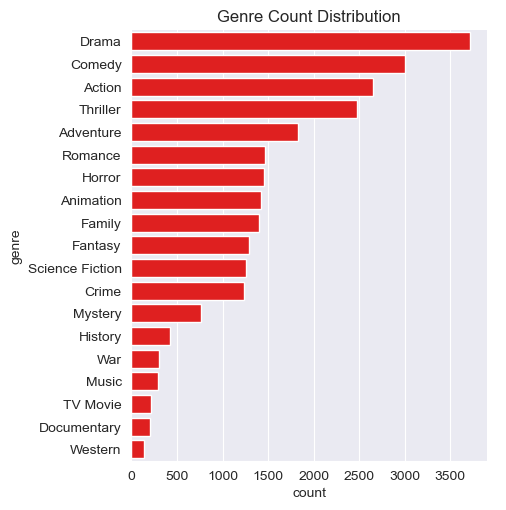

In [66]:
# We are going to build the Catplot

sns.catplot(y = "genre", data = df, kind = "count",
            order = df["genre"].value_counts().index,
            color = "red")
plt.title("Genre Count Distribution")
plt.show()

## 2. What Genre has Highest votes?


In [67]:
df.head()

,release_date,title,popularity,vote_count,vote_average,genre,release_year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


In [92]:
# We are going to build the Catplot

genre_votes = df.groupby('genre')['vote_count']
highest_votes_genre = genre_votes.sum().idxmax()
print("Genre that Has Highest Votes are: ", highest_votes_genre)

Genre that Has Highest Votes are:  Drama


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6484\2696275461.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_votes = df.groupby('genre')['vote_count']


## 3. What Movie has got the highest Popularity? and what's its Genre?

In [80]:
high_pop = df[df["popularity"] == df["popularity"].max()]
high_pop

,release_date,title,popularity,vote_count,vote_average,genre,release_year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


In [81]:
print("movies : ", high_pop["title"].unique(),
      "\nHas the Highest Popularity of : ", high_pop["popularity"].unique(),
      "\nAnd the Genre it Belongs are : ", high_pop["genre"].unique())

movies :  ['Spider-Man: No Way Home'] 
Has the Highest Popularity of :  [5083.954] 
And the Genre it Belongs are :  ['Action', 'Adventure', 'Science Fiction']
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']


## 4. What Movie has got the lowest Popularity? and what's its Genre?

In [75]:
lowest_pop = df[df["popularity"] == df["popularity"].min()]
lowest_pop

,release_date,title,popularity,vote_count,vote_average,genre,release_year
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021
25549,1984-09-23,Threads,13.354,186,popular,War,1984
25550,1984-09-23,Threads,13.354,186,popular,Drama,1984
25551,1984-09-23,Threads,13.354,186,popular,Science Fiction,1984


In [78]:
print("movies", lowest_pop["title"].unique(),
      "\nHas the Lowest Popularity of ", lowest_pop["popularity"].unique(),
      "\nAnd the Genre it Belongs are ", lowest_pop["genre"].unique())

movies ['The United States vs. Billie Holiday' 'Threads'] 
Has the Lowest Popularity of  [13.354] 
And the Genre it Belongs are  ['Music', 'Drama', 'History', 'War', 'Science Fiction']
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']


## 5. Which year has the most filmed movies

In [96]:
df.head()

,release_date,title,popularity,vote_count,vote_average,genre,release_year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6484\613350640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique.drop_duplicates(inplace = True)


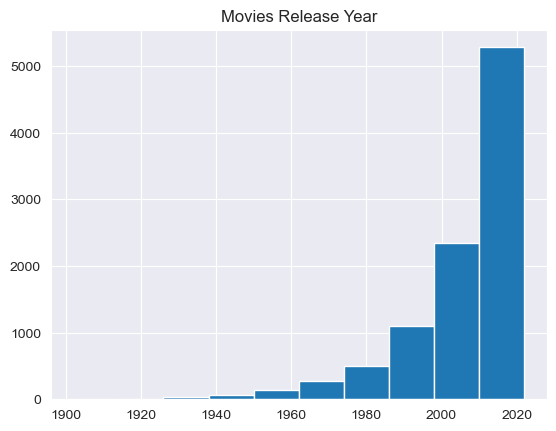

In [100]:
# There are multiple rows of same movies so we know that year will be counted multiplt times for each year
# So we need to delete the duplicates

unique = df[["title","release_year"]]
unique.drop_duplicates(inplace = True)


unique.hist()
plt.title("Movies Release Year")
plt.show()

###############################################################################################################################

# **Summary of Project:**

## Conclusion

### Q1: What is the most frequent genre in the dataset?
**`Drama`** genre is the most frequent genre in our dataset and has appeared more than **`14%`** of the times among **`19`** other genres.

### Q2: What genres have the highest votes?
We have **`25.5%`** of our dataset with popular votes (**`6520` rows**). **`Drama`** again gets the highest popularity among fans by having more than **`18.5%`** of movies.

### Q3: What movie got the highest popularity? What's its genre?
**`Spider-Man: No Way Home`** has the highest popularity rate in our dataset and it has genres of **`Action, Adventure, and Science Fiction`**.

### Q4: What movie got the lowest popularity? What's its genre?
**`The United States, Thread`** has the lowest popularity rate in our dataset, and it has genres of **`Music, Drama, War, Sci-Fi, and History`**.

### Q4: Which year has the most filmed movies?
Year **`2020`** has the highest filming rate in our dataset. more than `5000`


In [ ]:
# Answering First Question